## Final Project Submission

Please fill out:
* Student name: MUTUA MUKARIA BONFACE
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# 1. BUSINESS UNDERSTANDING


# 2. DATA UNDERSTANDING

#### 2.1 DATA COLLECTION

This project uses data from King County House Sales. The data is provided for this project as kc_house_data.csv

#### Loading the data

In [248]:
# Import the relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = pd.read_csv('data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


#### 2.2 DATA DESCRIPTION

|Column|        |Description|
|------|        |-----------|
|id|            |Unique identifier for a house| 
|date|          |Date house was sold|
|price|         |Sale price (prediction target)|
|bedrooms|      |Number of bedrooms|
|bathrooms|     |Number of bathrooms|
|sqft_living|   |Square footage of living space in the home|
|sqft_lot|      |Square footage of the lot|
|floors|        |Number of floors (levels) in house|
|waterfront|    |Whether the house is on a waterfront|
|view|          |Quality of view from house|
|condition|     |How good the overall condition of the house is. Related to maintenance of house|
|grade|         |Overall grade of the house. Related to the construction and design of the house|
|sqft_above|    |Square footage of house apart from basement|
|sqft_basement| |Square footage of the basement|
|yr_built|      |Year when house was built|
|yr_renovated|  |Year when house was renovated|
|zipcode|       |ZIP Code used by the United States Postal Service|
|lat|           |Latitude coordinate|
|long|          |Longitude coordinate|
|sqft_living15| |The square footage of interior housing living space for the nearest 15 neighbors|
|sqft_lot15|    |The square footage of the land lots of the nearest 15 neighbors|

In [249]:
# data frame description
data.describe(include = 'all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221,21534,...,21597,21597.000000,21597,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,2,5,...,11,NaN,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,6/23/2014,NaN,NaN,NaN,NaN,NaN,NaN,NO,NONE,...,7 Average,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,19075,19422,...,8974,NaN,12826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580474e+09,NaN,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,NaN,NaN,...,NaN,1788.596842,NaN,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,NaN,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,NaN,NaN,...,NaN,827.759761,NaN,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,NaN,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,NaN,NaN,...,NaN,370.000000,NaN,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,NaN,NaN,...,NaN,1190.000000,NaN,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,NaN,NaN,...,NaN,1560.000000,NaN,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,NaN,NaN,...,NaN,2210.000000,NaN,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


#### 2.3 SAMPLING STRATEGY

#### 2.3.1. TARGET POPULATION 

The target population for this project are the people living within the King County. The dataset contains more than sufficient information on whatever any house client would look into while purchasing or renting a house within this county. 

#### 2.3.2. SAMPLING METHOD 

As noted earlier on, this project uses data from King County House Sales. However, it contains several columns some of which are irrelevant in drawing the project's deductions. Thus, not all these columns are useable. The columns useable in this case trickle down to the data scientist's view on what is vitaly essential for home searchers in their quest of deciding in which house to settle on for residing purposes. 

#### 2.3.3. SAMPLE FRAME AND SIZE

Regarding the above statement, several columns in this dataset will be vital in making significant deductions from this project. The price which is the dependent variale in this case leads the line along with several others including, bedrooms, bathrooms, sqft-living, sqft-lot, waterfront, condition, grade, yr_built that are all possible independent variables of this project.

However, there is no certainity whether these all columns will be incusive in our model as some of them maybe subject to dropping at the data cleaning stage of the project.


#### 2.4 DESCRIBING THE QUESTION 

#### 2.4.1. SPECIFYING THE QUESTION 

#### 2.4.2. DEFINING THE METRIC FOR SUCCESS

#### 2.5 HYPOTHESIS TESTING PROCEDURE

#### 2.4.3. EXPERIMENTAL DESIGN 

# 3. DATA PREPARATION 

#### 3.1. SELECTING DATA

We will use the columns with no null values from the chosen columns, price, bedrooms, bathrooms, sqft-living, sqft-lot, waterfront, condition, grade, yr_built. These data sets will be recognized as df for this case. 

#### 3.2. DATA CLEANING 

In [250]:
# Checking for null values in the entire dataframe
data.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [251]:
# Checking for total null values in the entire dataframe
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The waterfront and yr_renovated columns are worth dropping

In [252]:
# loading the relevant dataset
df = data[['price' , 'bedrooms' , 'bathrooms' , 'sqft_living' , 'sqft_lot' , 'waterfront' , 'condition' , 'grade' , 'yr_built']]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,NaN,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,NO,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,NO,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,NO,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,NO,Average,8 Good,1987


In [253]:
# checking for missing values 
df.isnull()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built
0,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,True,False,False,False


There are missing values in the chosen dataset. So we further explore to check which column contain null values. 

In [254]:
# checking which column contains missing values
df.isnull().any()

price          False
bedrooms       False
bathrooms      False
sqft_living    False
sqft_lot       False
waterfront      True
condition      False
grade          False
yr_built       False
dtype: bool

In [255]:
# Checking the number of missing values in the said waterfront column above.
df.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

The waterfront column is the only column with missing values in this chosen dataset. It is a vital column in this dataset since it is one of the columns with categorical values that must be included in the project. However, there are two more remaining categorical columns in condition and grade. Furthermore, not all houses within this county will be on a waterfront thus rendering the column less vital. Again, the column has quite a huge number of data missing(2376). Thus the column is worth dropping. 


In [256]:
# dropping off the waterfront column 
cleandf = df.drop(['waterfront'], axis = 1)
cleandf

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,Average,8 Good,1987
...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,Average,8 Good,2009
21593,400000.0,4,2.50,2310,5813,Average,8 Good,2014
21594,402101.0,2,0.75,1020,1350,Average,7 Average,2009
21595,400000.0,3,2.50,1600,2388,Average,8 Good,2004


A further exploration of the data reveals bathroom is in float which does not make sense. We cannot have 2.25 bathrooms as the data depicts. Thus, there is a need to rectify this before rendering our data clean.

In [257]:
cleandf['bathrooms'] = cleandf.bathrooms.astype(int)
cleandf

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built
0,221900.0,3,1,1180,5650,Average,7 Average,1955
1,538000.0,3,2,2570,7242,Average,7 Average,1951
2,180000.0,2,1,770,10000,Average,6 Low Average,1933
3,604000.0,4,3,1960,5000,Very Good,7 Average,1965
4,510000.0,3,2,1680,8080,Average,8 Good,1987
...,...,...,...,...,...,...,...,...
21592,360000.0,3,2,1530,1131,Average,8 Good,2009
21593,400000.0,4,2,2310,5813,Average,8 Good,2014
21594,402101.0,2,0,1020,1350,Average,7 Average,2009
21595,400000.0,3,2,1600,2388,Average,8 Good,2004


At this point, our data is clean and can be used in making predictions.

Dropping this column ensures, validity, uniformity, consistency, and accuracy of the project's results. From here, cleandf remains the dataframe to be used. 

# 4. DATA ANALYSIS

#### 4.1 EXPLORATORY DATA ANALYSIS 

#### 4.1.1. UNIVARIATE DATA ANALYSIS

#### a. Numerical

In [258]:
# Dataframe summary
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  int32  
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   condition    21597 non-null  object 
 6   grade        21597 non-null  object 
 7   yr_built     21597 non-null  int64  
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 1.2+ MB


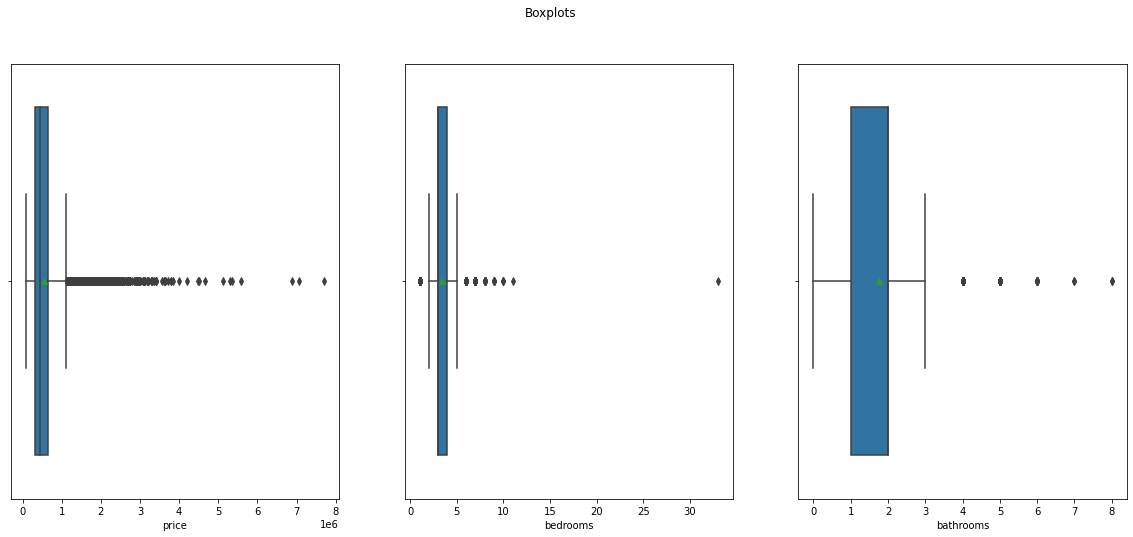

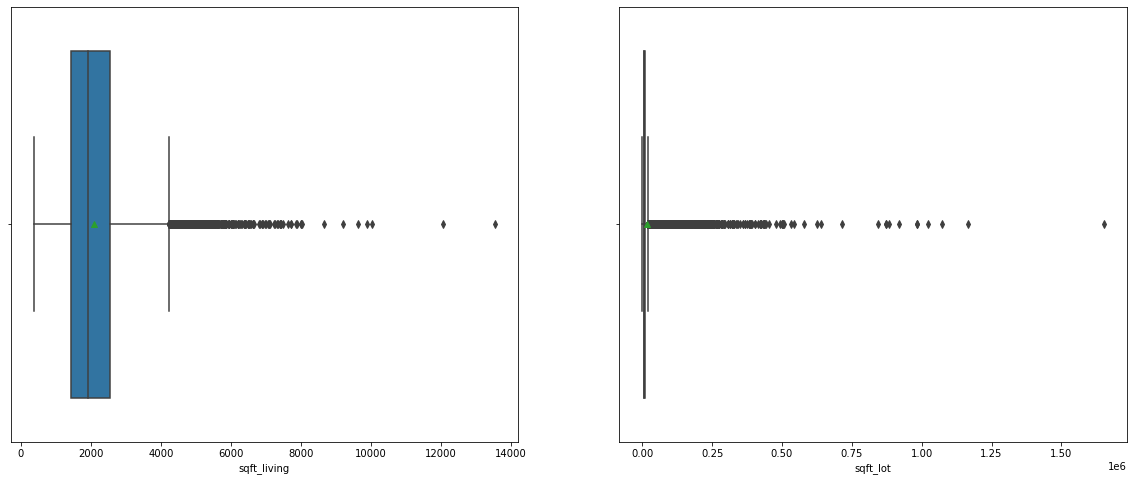

In [259]:
#outliers
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20, 8))
fig.suptitle('Boxplots')
sns.boxplot(x = cleandf['price'], ax=ax1, showmeans = True)
sns.boxplot(x = cleandf['bedrooms'], ax=ax2, showmeans = True)
sns.boxplot(x = cleandf['bathrooms'], ax=ax3, showmeans = True)

fig, (ax4,ax5) = plt.subplots(1,2, figsize=(20, 8))
sns.boxplot(x = cleandf['sqft_living'], ax=ax4, showmeans = True)
sns.boxplot(x = cleandf['sqft_lot'], ax=ax5, showmeans = True)
plt.show()


The above boxplots indicates that the datasets have alot of outliers. 

In [260]:
# Checking for Outliers

Q1_price = cleandf['price'].quantile(.25)
Q3_price = cleandf['price'].quantile(.75)

IQR_price = Q3_price - Q1_price


anomalies = cleandf[(cleandf.price < Q1_price - 1.5* IQR_price)  |
                    (cleandf.price > Q3_price + 1.5 * IQR_price) ]
print('prices outliers are: ' + str(anomalies.price.count()))

Q1_bedrooms = cleandf['bedrooms'].quantile(.25)
Q3_bedrooms = cleandf['bedrooms'].quantile(.75)

IQR_bedrooms = Q3_bedrooms - Q1_bedrooms


anomalies = cleandf[(cleandf.bedrooms < Q1_bedrooms - 1.5* IQR_bedrooms)  |
                    (cleandf.bedrooms > Q3_bedrooms + 1.5 * IQR_bedrooms) ]
print('bedrooms outliers are: ' + str(anomalies.bedrooms.count()))

Q1_bathrooms = cleandf['bathrooms'].quantile(.25)
Q3_bathrooms = cleandf['bathrooms'].quantile(.75)

IQR_bathrooms = Q3_bathrooms - Q1_bathrooms


anomalies = cleandf[(cleandf.bathrooms < Q1_bathrooms - 1.5* IQR_bathrooms)  |
                    (cleandf.bathrooms > Q3_bathrooms + 1.5 * IQR_bathrooms) ]
print('bathrooms outliers are: ' + str(anomalies.bathrooms.count()))

Q1_sqft_living = cleandf['sqft_living'].quantile(.25)
Q3_sqft_living = cleandf['sqft_living'].quantile(.75)

IQR_sqft_living = Q3_sqft_living - Q1_sqft_living


anomalies = cleandf[(cleandf.sqft_living < Q1_sqft_living - 1.5* IQR_sqft_living)  |
                    (cleandf.sqft_living > Q3_sqft_living + 1.5 * IQR_sqft_living) ]
print('sqft_living outliers are: ' + str(cleandf.sqft_living.count()))

Q1_sqft_lot = cleandf['sqft_lot'].quantile(.25)
Q3_sqft_lot = cleandf['sqft_lot'].quantile(.75)

IQR_sqft_lot = Q3_sqft_lot - Q1_sqft_lot


anomalies = cleandf[(cleandf.sqft_lot < Q1_sqft_lot - 1.5* IQR_sqft_lot)  |
                    (cleandf.sqft_lot > Q3_sqft_lot + 1.5 * IQR_sqft_lot) ]
print('sqft_lot outliers are: ' + str(anomalies.sqft_lot.count()))

prices outliers are: 1158
bedrooms outliers are: 530
bathrooms outliers are: 402
sqft_living outliers are: 21597
sqft_lot outliers are: 2419


Going by the numbers of the outliers, they are too many to be dropped. Dropping them will affect the data analysis deductions going forward. Thus, retaining them is not only a neccessity but a need.

#### b. Categorical

<AxesSubplot:>

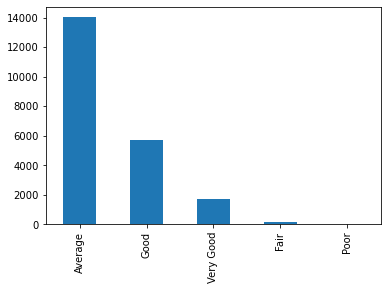

In [261]:
cleandf.condition.value_counts().plot.bar()

The majority of the houses are in averange condition. 

<AxesSubplot:>

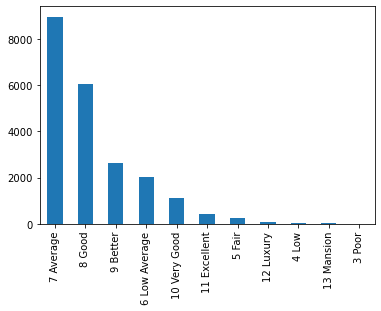

In [262]:
cleandf.grade.value_counts().plot.bar()

The houses are rated 7 Average in grades. 

#### c. Summary

In [263]:
# Checking the data description 
cleandf.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000
mean,5.402966e+05,3.373200,1.750660,2080.321850,1.509941e+04,1970.999676
std,3.673681e+05,0.926299,0.734042,918.106125,4.141264e+04,29.375234
min,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1900.000000
25%,3.220000e+05,3.000000,1.000000,1430.000000,5.040000e+03,1951.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1975.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,2015.000000


#### 4.1.2. BIVARIATE DATA ANALYSIS 

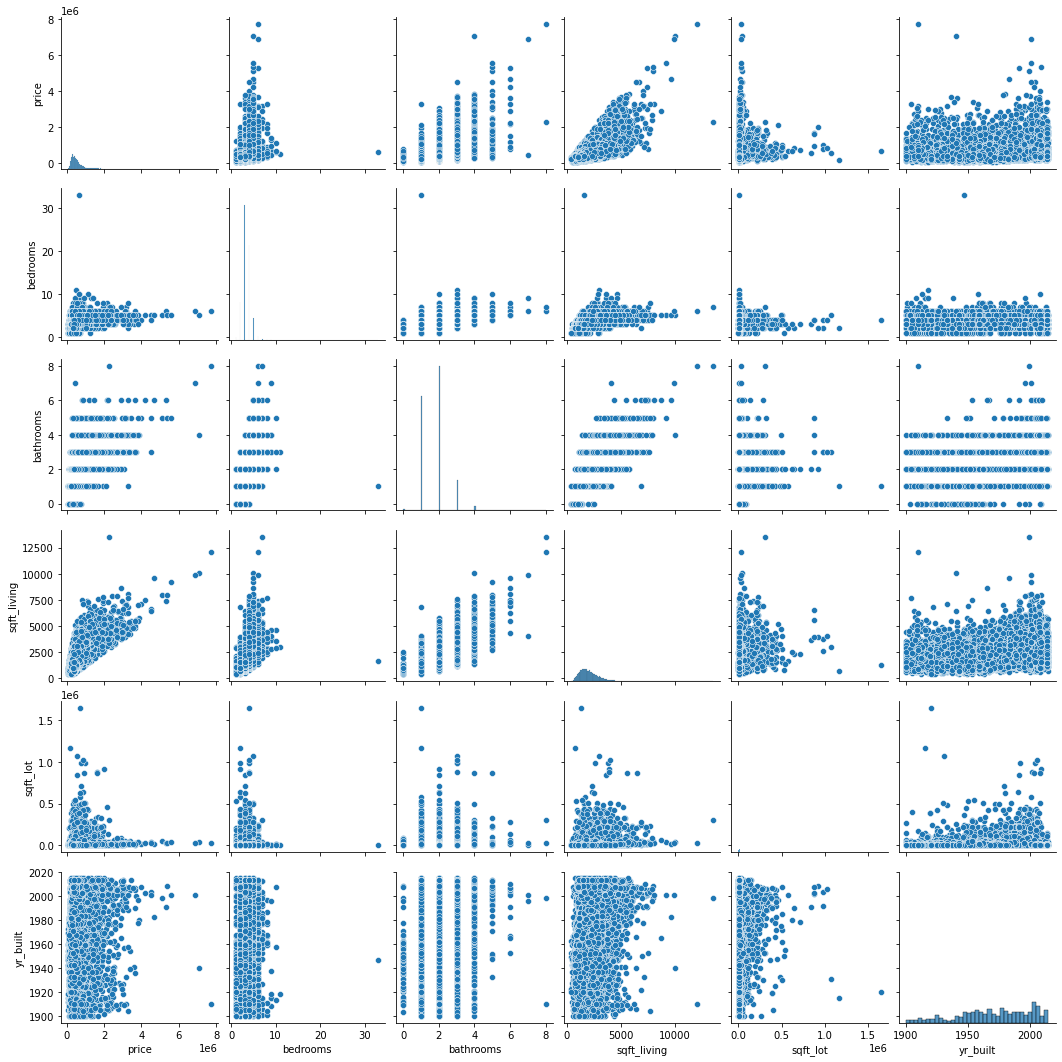

In [264]:
import seaborn as sns
sns.pairplot(cleandf)
plt.show()

#### 4.1.3. MULTIVARIATE ANALYSIS

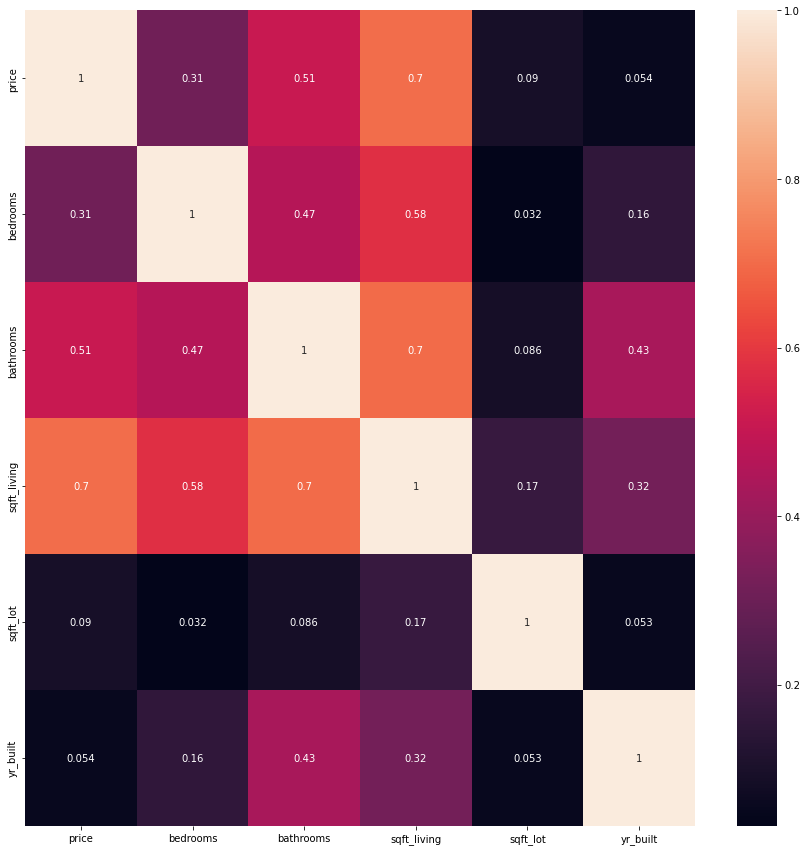

In [265]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(cleandf.corr(), annot = True)
plt.show()

In [266]:
# checking the overall correlation of price with all independent variables
cleandf.corr()['price']

price          1.000000
bedrooms       0.308787
bathrooms      0.510631
sqft_living    0.701917
sqft_lot       0.089876
yr_built       0.053953
Name: price, dtype: float64

This part will contain the linear regression part and model of this project. As stated earlier, the price is the dependent variabe in this project while all others are independent variables. Out of the list of independent variables, this section uses the sqft_living of a house to check its dictation on the price of a house. It is one of the most positively correlated with the price. 

#### a. Simple linear regression model

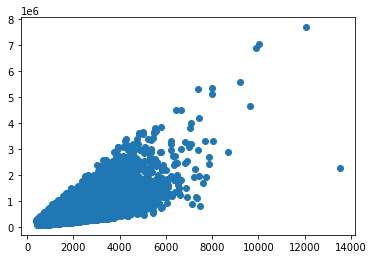

In [267]:
# checking correlation between the independent and dependent variables
y_simple = cleandf['price']
X_simple = cleandf['sqft_living']
plt.scatter(X_simple, y_simple)

The graph above shows a positive correlation between the price of a house and sqft_living. From here, the project goes further to explore the extent of the dictation. 

In [268]:
# Linear regression model formulation 
simple_model = sm.OLS(y_simple, sm.add_constant(X_simple))
# fitting the model
simple_results = simple_model.fit()

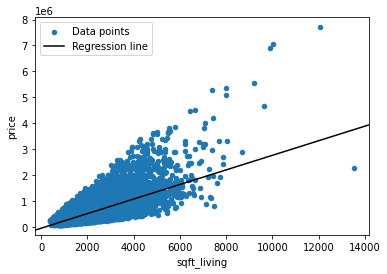

In [269]:
# Regression line
x = X_simple
y = y_simple
fig, ax = plt.subplots()
cleandf.plot.scatter(x = 'sqft_living' , y = 'price' , label = 'Data points' , ax = ax)
sm.graphics.abline_plot(model_results = simple_results, label = 'Regression line', ax = ax , color = 'black')
ax.legend();

In [270]:
# Linear_model results summary
print(simple_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:01:25   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

#### Model Interpretations 

From the table above, y = 280.8630sqft_living - 43990

This model is statistically significant in that the F-statistic is below the threshold p_value 0.005. Thus, we fail to reject the null hypothesis which in this case is by default 'the two variables are not dependent on each other' and conclude that the two variables are dependent on each other. 

The model explains about 49% of the variance in the price of houses. 

For a house with zero sqft_living, there would be a drop in its price by $43990.

An increase in sqft_living by 1 unit would result to an alternative increase in the price of the house by $280

In [271]:
# Finding out data types for this set
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  int32  
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   condition    21597 non-null  object 
 6   grade        21597 non-null  object 
 7   yr_built     21597 non-null  int64  
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 1.2+ MB


There is a revelation that condition and grade are the available categorical columns in this dataset.

In [272]:
# using pandas to one-hot encode on the entire dataframes that seem categorical 
pd.get_dummies(cleandf, columns = ['condition' , 'grade'])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,condition_Average,condition_Fair,condition_Good,condition_Poor,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1,1180,5650,1955,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2,2570,7242,1951,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1,770,10000,1933,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3,1960,5000,1965,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2,1680,8080,1987,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2,1530,1131,2009,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21593,400000.0,4,2,2310,5813,2014,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21594,402101.0,2,0,1020,1350,2009,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21595,400000.0,3,2,1600,2388,2004,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [273]:
cleandf['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

<AxesSubplot:xlabel='condition'>

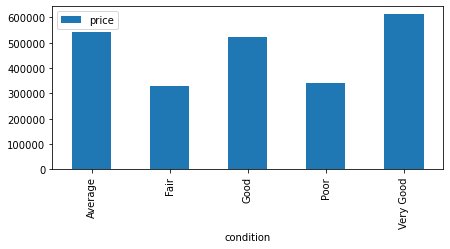

In [274]:
fig, ax = plt.subplots(figsize = (7 , 3))
cleandf.groupby('condition').mean().plot.bar(y = 'price' , ax =ax)

As the names suggest, average implies that the house is in an average condition, good implies it is in a good condition, very good implies it is in a very good condition, fair implies it is in a fair condition, while poor implies it is in a poor condition. 

In [275]:
cleandf['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade'>

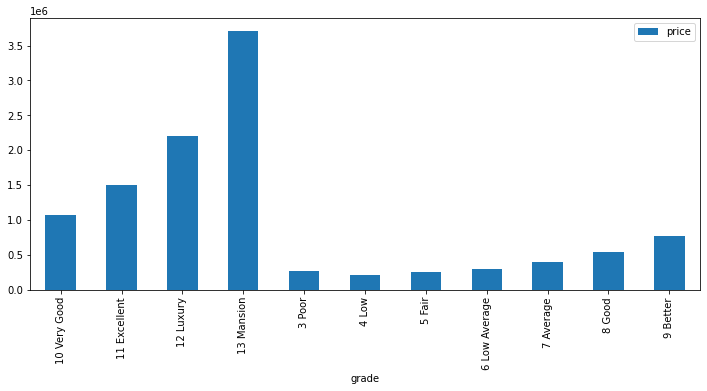

In [276]:
fig, ax = plt.subplots(figsize = (12, 5))
cleandf.groupby('grade').mean().plot.bar(y = 'price' , ax =ax)

Just like for condition above, the names very good, excellent, mansion, poor, low, fair, low average, good, and better all imply the grades as per rating of the house consitions. 

However, both the grade and condition and grade coulmns of the houses seem to be representing the same thing, the nature of the house. For this reason, the project drops the grade categorical column and utilizes the condition column.

#### CATEGORICAL VARIABLES INCLUSION - ONE-HOT ENCODING

In [277]:
# Addition of the condition categorical variable to the initial simple model
X_iterated = cleandf[['sqft_living' , 'condition']]
X_iterated

,sqft_living,condition
0,1180,Average
1,2570,Average
2,770,Average
3,1960,Very Good
4,1680,Average
...,...,...
21592,1530,Average
21593,2310,Average
21594,1020,Average
21595,1600,Average


In [278]:
X_iterated = pd.get_dummies(X_iterated, columns=['condition'])
X_iterated

,sqft_living,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,1180,1,0,0,0,0
1,2570,1,0,0,0,0
2,770,1,0,0,0,0
3,1960,0,0,0,0,1
4,1680,1,0,0,0,0
...,...,...,...,...,...,...
21592,1530,1,0,0,0,0
21593,2310,1,0,0,0,0
21594,1020,1,0,0,0,0
21595,1600,1,0,0,0,0


In [279]:
X_iterated.drop("condition_Very Good", axis=1, inplace=True)
X_iterated

,sqft_living,condition_Average,condition_Fair,condition_Good,condition_Poor
0,1180,1,0,0,0
1,2570,1,0,0,0
2,770,1,0,0,0
3,1960,0,0,0,0
4,1680,1,0,0,0
...,...,...,...,...,...
21592,1530,1,0,0,0
21593,2310,1,0,0,0
21594,1020,1,0,0,0
21595,1600,1,0,0,0


In [280]:
iterated_model = sm.OLS(y_simple, sm.add_constant(X_iterated))
iterated_results = iterated_model.fit()

In [281]:
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     4307.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:01:28   Log-Likelihood:            -2.9992e+05
No. Observations:               21597   AIC:                         5.999e+05
Df Residuals:                   21591   BIC:                         5.999e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.036e+04   7425.72

In [282]:
from sklearn.metrics import mean_absolute_error

iterated_mae = mean_absolute_error(y_simple, iterated_results.predict(sm.add_constant(X_iterated)))
simple_mae, iterated_mae

(173824.8874961749, 172889.67867231191)

In [283]:
simple_results.rsquared_adj, iterated_results.rsquared_adj

(0.492664406931022, 0.49926216562193215)

In [284]:
cleandf.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built
0,221900.0,3,1,1180,5650,Average,7 Average,1955
1,538000.0,3,2,2570,7242,Average,7 Average,1951
2,180000.0,2,1,770,10000,Average,6 Low Average,1933
3,604000.0,4,3,1960,5000,Very Good,7 Average,1965
4,510000.0,3,2,1680,8080,Average,8 Good,1987


In [285]:
y_multiple = cleandf['price']
X_multiple = cleandf[['bedrooms' , 'bathrooms' , 'sqft_living' , 'condition']]

In [286]:
X_multiple = pd.get_dummies(X_multiple, columns=['condition'])
X_multiple

,bedrooms,bathrooms,sqft_living,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,3,1,1180,1,0,0,0,0
1,3,2,2570,1,0,0,0,0
2,2,1,770,1,0,0,0,0
3,4,3,1960,0,0,0,0,1
4,3,2,1680,1,0,0,0,0
...,...,...,...,...,...,...,...,...
21592,3,2,1530,1,0,0,0,0
21593,4,2,2310,1,0,0,0,0
21594,2,0,1020,1,0,0,0,0
21595,3,2,1600,1,0,0,0,0


In [287]:
X_multiple.drop("condition_Very Good", axis=1, inplace=True)
X_multiple

,bedrooms,bathrooms,sqft_living,condition_Average,condition_Fair,condition_Good,condition_Poor
0,3,1,1180,1,0,0,0
1,3,2,2570,1,0,0,0
2,2,1,770,1,0,0,0
3,4,3,1960,0,0,0,0
4,3,2,1680,1,0,0,0
...,...,...,...,...,...,...,...
21592,3,2,1530,1,0,0,0
21593,4,2,2310,1,0,0,0
21594,2,0,1020,1,0,0,0
21595,3,2,1600,1,0,0,0


In [288]:
multiple_model = sm.OLS(y_multiple, sm.add_constant(X_multiple))
multiple_results = multiple_model.fit()
# Multiple results
print(multiple_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     3311.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:01:28   Log-Likelihood:            -2.9952e+05
No. Observations:               21597   AIC:                         5.990e+05
Df Residuals:                   21589   BIC:                         5.991e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.644e+05   9066.63

In [289]:
# clean
improved = data.drop('price' , axis = 1).select_dtypes('number')
improved

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,1.0,770,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,1530,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,4,2.50,2310,5813,2.0,2310,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2,0.75,1020,1350,2.0,1020,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,3,2.50,1600,2388,2.0,1600,2004,0.0,98027,47.5345,-122.069,1410,1287


In [290]:
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [291]:
data.dropna(axis = 0 , inplace = True)

In [292]:
data.dropna(axis = 1, inplace = True)

In [293]:
data
y = data['price']
X = data.drop('price' , axis = 1, inplace = True)

In [294]:
data.drop(['condition' , 'grade' , 'waterfront' , 'view' , 'id' , 'yr_renovated' , 
           'date' , 'zipcode' , 'lat' , 'long' , 'sqft_basement' , 'yr_built'] , axis = 1, inplace =True)


In [295]:
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15
1,3,2.25,2570,7242,2.0,2170,1690,7639
3,4,3.00,1960,5000,1.0,1050,1360,5000
4,3,2.00,1680,8080,1.0,1680,1800,7503
5,4,4.50,5420,101930,1.0,3890,4760,101930
6,3,2.25,1715,6819,2.0,1715,2238,6819


In [296]:
modelm = sm.OLS(y, sm.add_constant(data))
results_modelm = modelm.fit()
print(results_modelm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     2156.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:02:23   Log-Likelihood:            -2.1872e+05
No. Observations:               15762   AIC:                         4.375e+05
Df Residuals:                   15753   BIC:                         4.375e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.724e+04   1.01e+04      1.701

Although the model is statistically significant in its attained p_value of 0.00 < 0.05, it is not a good predictor of the variances in the price of houses. Such a low level model signifies an exclusion of some of the key predictors of the house prices. Thus, we can better it by adding some of the ommitted variables. 

In [176]:
# Add more data to 
improved_df = data[['price' , 'bedrooms' , 'bathrooms' , 'sqft_living' , 'sqft_lot' , 'floors', 'sqft_above' ,
                    'sqft_living15' , 'sqft_lot15']]

improved_df['bathrooms'] = cleandf.bathrooms.astype(int)
improved_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1.0,1180,1340,5650
1,538000.0,3,2,2570,7242,2.0,2170,1690,7639
2,180000.0,2,1,770,10000,1.0,770,2720,8062
3,604000.0,4,3,1960,5000,1.0,1050,1360,5000
4,510000.0,3,2,1680,8080,1.0,1680,1800,7503
...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2,1530,1131,3.0,1530,1530,1509
21593,400000.0,4,2,2310,5813,2.0,2310,1830,7200
21594,402101.0,2,0,1020,1350,2.0,1020,1020,2007
21595,400000.0,3,2,1600,2388,2.0,1600,1410,1287


In [177]:
transformed_y = improved_df['price']
transformed_X = improved_df.drop('price' , axis = 1)
transformed_X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_living15,sqft_lot15
0,3,1,1180,5650,1.0,1180,1340,5650
1,3,2,2570,7242,2.0,2170,1690,7639
2,2,1,770,10000,1.0,770,2720,8062
3,4,3,1960,5000,1.0,1050,1360,5000
4,3,2,1680,8080,1.0,1680,1800,7503
...,...,...,...,...,...,...,...,...
21592,3,2,1530,1131,3.0,1530,1530,1509
21593,4,2,2310,5813,2.0,2310,1830,7200
21594,2,0,1020,1350,2.0,1020,1020,2007
21595,3,2,1600,2388,2.0,1600,1410,1287


In [171]:
# transformed_X = data[['condition']].copy()
# transformed_X.sample(10, random_state = 2)

# transformed_X = pd.get_dummies(transformed_X, columns = [])
# transformed_X

,condition
570,Average
19700,Average
13482,Average
11504,Good
18868,Very Good
14411,Average
1000,Average
10593,Average
6902,Good
20533,Average


In [172]:
# transformed_X = pd.get_dummies(transformed_X, columns = ['condition'])
# transformed_X

,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
21592,1,0,0,0,0
21593,1,0,0,0,0
21594,1,0,0,0,0
21595,1,0,0,0,0


In [173]:
# transformed_X.drop("condition_Very Good", axis=1, inplace=True)
# transformed_X

,condition_Average,condition_Fair,condition_Good,condition_Poor
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,0,0
4,1,0,0,0
...,...,...,...,...
21592,1,0,0,0
21593,1,0,0,0
21594,1,0,0,0
21595,1,0,0,0


In [178]:
transformed_model = sm.OLS(transformed_y, sm.add_constant(transformed_X))
transformed_results = transformed_model.fit()
print(transformed_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     2925.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:13:24   Log-Likelihood:            -2.9946e+05
No. Observations:               21597   AIC:                         5.989e+05
Df Residuals:                   21588   BIC:                         5.990e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.165e+04   8590.897      1.356

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>]], dtype=object)

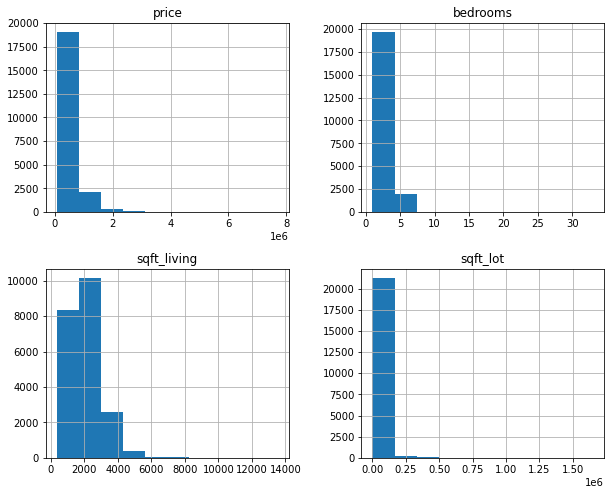

In [78]:
# Checking for normality 
cleandf[['price' , 'bedrooms' , 'sqft_living' , 'sqft_lot']].hist(figsize = (10 , 8))


By the look of the above graphs, the data used is not normally distributed as recommended for linear regressions. The first step in bettering our model is transforming the data into a normal distribution. The skewness of the above models still suggests the same, the data used is not normally distributed. Therefore, we seek to make our data normally distributed. 

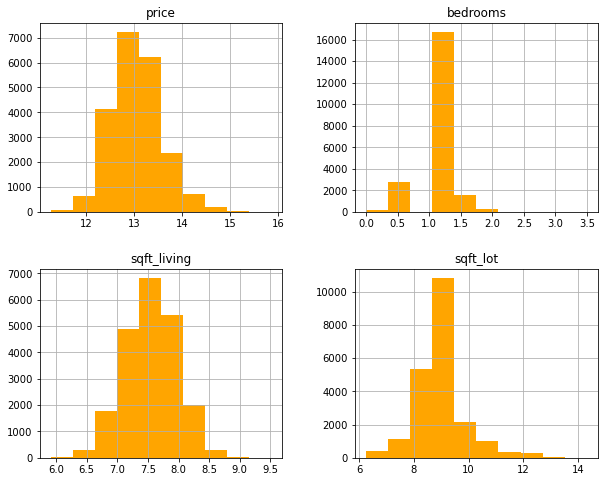

In [88]:
norm_data = np.log(cleandf[['price' , 'bedrooms' , 'sqft_living' , 'sqft_lot']]).hist(figsize = (10 , 8) , color = 'orange')

In [89]:
# Transforming the data to normal distribution
import warnings
warnings.filterwarnings('ignore')
cleandf[['normalprice' ,
             'normbedrooms' , 
             'normsqft_living' , 
             'normsqft_lot']] = np.log(cleandf[['price' , 
                                       'bedrooms' , 
                                       'sqft_living' , 
                                       'sqft_lot']])
cleandf.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built,normalprice,normbedrooms,normsqft_living,normsqft_lot
0,221900.0,3,1,1180,5650,Average,7 Average,1955,12.309982,1.098612,7.073270,8.639411
1,538000.0,3,2,2570,7242,Average,7 Average,1951,13.195614,1.098612,7.851661,8.887653
2,180000.0,2,1,770,10000,Average,6 Low Average,1933,12.100712,0.693147,6.646391,9.210340
3,604000.0,4,3,1960,5000,Very Good,7 Average,1965,13.311329,1.386294,7.580700,8.517193
4,510000.0,3,2,1680,8080,Average,8 Good,1987,13.142166,1.098612,7.426549,8.997147


In [93]:
normal_data = cleandf[['normalprice','normbedrooms','normsqft_living','normsqft_lot','condition']]
normal_data.head()

,normalprice,normbedrooms,normsqft_living,normsqft_lot,condition
0,12.309982,1.098612,7.073270,8.639411,Average
1,13.195614,1.098612,7.851661,8.887653,Average
2,12.100712,0.693147,6.646391,9.210340,Average
3,13.311329,1.386294,7.580700,8.517193,Very Good
4,13.142166,1.098612,7.426549,8.997147,Average


In [98]:
transformed_y = normal_data['normalprice']
transformed_X = normal_data[['normbedrooms','normsqft_living','normsqft_lot','normsqft_lot','condition']]
X_transformed = pd.get_dummies(transformed_X, columns=['condition'])
X_transformed.drop("condition_Very Good", axis=1, inplace=True)

transformed_model = sm.OLS(transformed_y, sm.add_constant(X_transformed))
transformed_results = transformed_model.fit()
print(transformed_results.summary())

                            OLS Regression Results                            
Dep. Variable:            normalprice   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     2934.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:40:37   Log-Likelihood:                -9573.3
No. Observations:               21597   AIC:                         1.916e+04
Df Residuals:                   21589   BIC:                         1.923e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.2106    

In [101]:
# Checking for Linearity
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(transformed_results)

(0.9809162387412689, 0.8415680835731446)

This model generates a p-value of about 0.84. This is much higher than the standard alpha of 0.05, so we fail to reject the null hypothesis and can consider the relationship to be linear